<font color='Purple'><b> 
#### --------------------------------------------------------------------------------------------------------------------------
## Image Text Extraction Using Python

### DIP Mini Project

#### Shubham More (1822027)
#### Shraddha Waghmare (1822028)

#### -------------------------------------------------------------------------------------------------------------------------------
</b></font>

<font color='red'><b>Python-tesseract is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.</b></font>

In [5]:
#pip install pytesseract

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

<font color='red'><b>Mention the installed location of Tesseract-OCR in your system.

Then, head to https://github.com/UB-Mannheim/tesseract/wiki website, download and install the Tesseract OCR executable. 

At the time of this writing, I am using the 64-bit Alpha Build v5.0.0, compiled on 2020–10–25</b></font>

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

<font color='red'><b>pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'</b></font> 

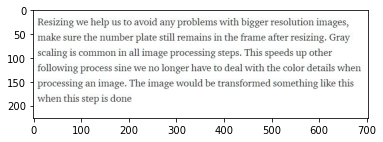

In [8]:
img = cv2.imread("boom1.jpg",cv2.IMREAD_COLOR)
plt.imshow(img)

<font color='red'><b>Convert the image to gray scale 

https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/
</b></font>

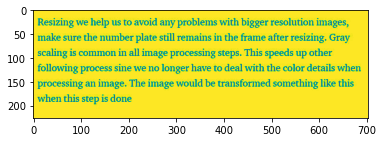

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

<font color='red'><b>Performing OTSU threshold 
    
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html</b></font>

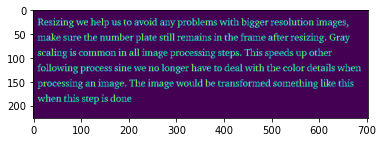

In [10]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) # | --> Bitwise OR

plt.imshow(thresh1)

<font color='red'><b>Specify structure shape and kernel size.  

Kernel size increases or decreases the area of the rectangle to be detected. 

A smaller value like (10, 10) will detect each word instead of a sentence. 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html</b></font>

In [11]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
rect_kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<font color='red'><b>Appplying dilation on the threshold image
    
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html</b></font> 

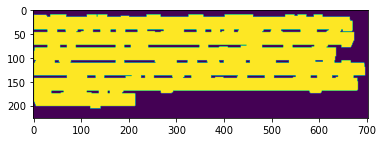

In [12]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
plt.imshow(dilation)

<font color='red'><b>Finding contours 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html</b></font> 

In [13]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

<font color='red'><b>Creating a copy of image </b></font> 

In [14]:
im2 = img.copy() 

<font color='red'><b>A text file is created 
    
https://www.w3schools.com/python/python_file_write.asp</b></font> 

In [15]:
file = open("recognized3.txt", "w+") 
file.write("") 
file.close() 

<font color='red'><b>Looping through the identified contours 

Then rectangular part is cropped and passed on to pytesseract for extracting text from it.

Extracted text is then written into the text file 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html

https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/</b></font> 

In [16]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    # SYNTAX --> image = cv2.rectangle(image, start_point, end_point, color, thickness)
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
    
    
    # Open the file in append mode 
    file = open("recognized3.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
    print(text)
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 
    

 

 

Resizing we help us to avoid any problems with bigger resolution images,
make sure the number plate still remains in the frame after resizing. Gray
scaling is common in all image processing steps. This speeds up other
following process sine we no longer have to deal with the color details when
processing an image. The image would be transformed something like this
when this step is done

 

 



<font color='red'><b> Drawing contour on image just to see which text is detected</b></font>

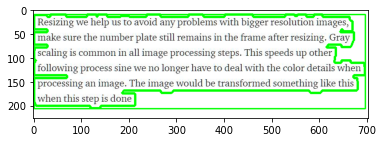

In [17]:
cv2.drawContours(im2, contours, -1, (0, 255, 0), 3) 
plt.imshow(im2)